In [180]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.options.mode.chained_assignment = None
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [350]:
with open("all_movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)

In [333]:
df = pd.DataFrame(all_movies)
df['production_budget'] = df['production_budget']*1000000
df['budget'] = 0
df['budget'][df['imdb_budget'] != 0]  = df['imdb_budget']
df['budget'][df['imdb_budget'] == 0]  = df['production_budget']
df['ones'] = int(1)
df['month'] = df['release_date'].map(lambda x: x.month)
df['roi'] = df['domestic_gross']/df['budget']
df['roi'] = df['roi'].astype(int)
df['budget'] = df['budget'].where(df['budget']!=0, np.nan) 
df = df.sort(['domestic_gross'], ascending = False)
df = df[df.budget <= 270000000]
df

,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,ones,month,roi
0,Buena Vista,623357910,895237000,Action / Adventure,220000000,2.200000e+08,PG-13,2012-05-04,142,Marvel's The Avengers,1518594910,220000000,1,5,2
1,Warner Bros.,448139099,636300000,Action Thriller,250000000,2.500000e+08,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,1,7,1
665,Lionsgate,424668047,440244916,Action / Adventure,130000000,1.300000e+08,PG-13,2013-11-22,146,The Hunger Games: Catching Fire,864912963,130000000,1,11,3
666,Buena Vista,409013994,806426000,Action / Adventure,200000000,2.000000e+08,PG-13,2013-05-03,129,Iron Man 3,1215439994,200000000,1,5,2
2,Lionsgate,408010692,283237076,Action / Adventure,78000000,7.800000e+07,PG-13,2012-03-23,142,The Hunger Games,691247768,78000000,1,3,5
667,Buena Vista,400738009,873481000,Animation,150000000,1.500000e+08,PG,2013-11-22,108,Frozen,1274219009,150000000,1,11,2
668,Universal,368061265,602700620,Animation,76000000,7.600000e+07,PG,2013-07-03,98,Despicable Me 2,970761885,76000000,1,7,4
1352,Warner Bros.,350126372,197000000,Drama,58800000,5.880000e+07,R,2014-12-25,132,American Sniper,547126372,58800000,1,12,5
1353,Lionsgate,337135885,414964344,Action / Adventure,125000000,1.250000e+08,PG-13,2014-11-21,123,The Hunger Games: Mockingjay - Part 1,752100229,125000000,1,11,2
1354,Buena Vista,333176600,441000000,Action / Adventure,170000000,1.700000e+08,PG-13,2014-08-01,121,Guardians of the Galaxy,774176600,170000000,1,8,1


###Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

###Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [334]:
y, X = dmatrices('roi ~ budget', data=df, return_type='dataframe')

In [335]:
#X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.220
Date:                Tue, 14 Jul 2015   Prob (F-statistic):             0.0226
Time:                        15:07:48   Log-Likelihood:                -1896.1
No. Observations:                 737   AIC:                             3796.
Df Residuals:                     735   BIC:                             3805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3259      0.144      9.214      0.000         1.043     1.608
budget     -5.413e-09   2.37e-09     -2.285      0.023     -1.01e-08 -7.62e-10
==============================================================================
Omnibus:                     1108.238   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376920.557
Skew:                           8.478   Prob(JB):                         0.00
Kurtosis:                     112.484   Cond. No.                     7.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [336]:
X.head()

,Intercept,budget
0,1,220000000
1,1,250000000
665,1,130000000
666,1,200000000
2,1,78000000


In [337]:
X_prime = np.linspace(X.budget.min(), X.budget.max(), 200)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
y_hat = results.predict(X_prime)

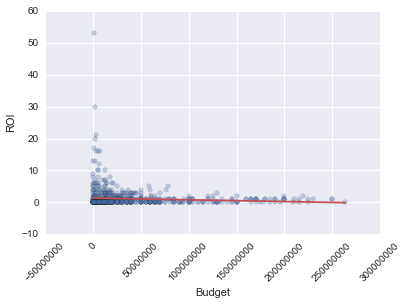

In [338]:
plt.scatter(X.budget, y, alpha=0.3)
plt.xlabel("Budget")
plt.ylabel("ROI")
plt.plot(X_prime[:, 1], y_hat, 'r')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.show()

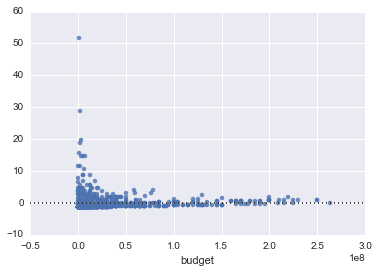

In [339]:
sns.residplot(X.budget,y)

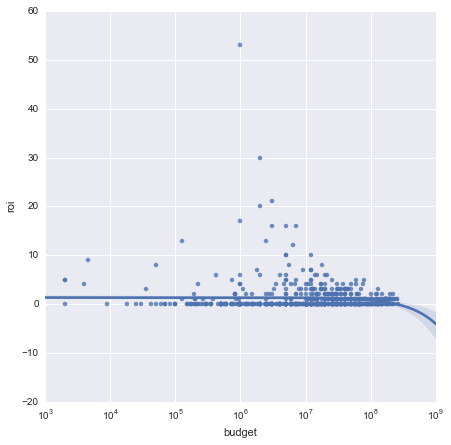

In [345]:
#sns.regplot(x="imdb_budget", y="domestic_gross", logx = True, data=df2 )

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.regplot(x="budget", y="roi", data = df)
plt.show()

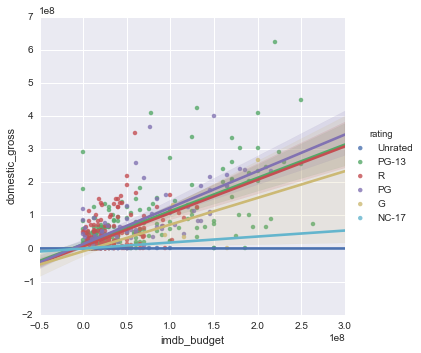

In [183]:
sns.lmplot(x="imdb_budget", y="domestic_gross", hue="rating", data=df2);

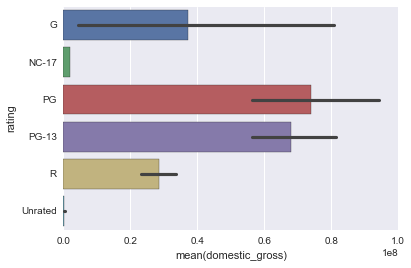

In [207]:
sns.barplot(x="domestic_gross", y="rating", data=df2.sort('rating'));

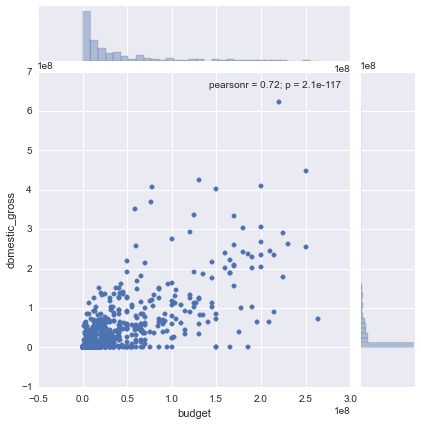

In [347]:
#sns.distplot(X.imdb_budget)
#sns.distplot(X.imdb_budget, kde=False, rug=True);
#sns.jointplot(x="budget", y="domestic_gross", data=df2);

g = sns.jointplot(x="budget", y="domestic_gross", data=df2);
#g.fig.get_axes()[0].set_yscale('log')
#g.fig.get_axes()[0].set_xscale('log')
plt.show()

#sns.pairplot(df2);

###Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

###Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

###Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.